#### 03. Is our DNN ready to be trained?

In [2]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import h5py
from tensorflow.keras.utils import plot_model

sys.path.insert(0, "../")
from architectures.laddernet import LadderNet
from architectures.unet import UNet
from metrics.multiclass_dice import multiclass_dice

In [15]:
f = h5py.File("../../data/image_dataset_normalized.hdf5", "r")
example = f["train 2ch frames"][0,:,:,0]
example = example.reshape([1, 384, 384, 1])
example.shape

(1, 384, 384, 1)

In [16]:
model_laddernet = LadderNet(input_size=(384, 384, 1), num_classes=4, filters=20)
model_unet = UNet(input_size=(384, 384, 1), depth=5, num_classes=4, filters=10, batch_norm=True)

In [17]:
model_laddernet.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 384, 384, 1) 0                                            
__________________________________________________________________________________________________
conv2d_53 (Conv2D)              (None, 384, 384, 20) 200         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_54 (Conv2D)              (None, 384, 384, 20) 3620        conv2d_53[0][0]                  
                                                                 dropout_20[0][0]                 
__________________________________________________________________________________________________
batch_normalization_63 (BatchNo (None, 384, 384, 20) 80          conv2d_54[0][0]            

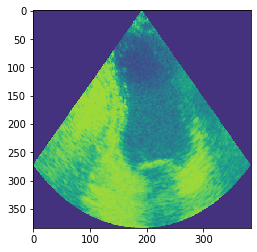

In [18]:
plt.imshow(example[0,:,:,0])
plt.show()

#### We can try to predict an example eco without train anything (random weights)

In [19]:
ladder_out = model_laddernet.predict(example)
unet_out = model_unet.predict(example)

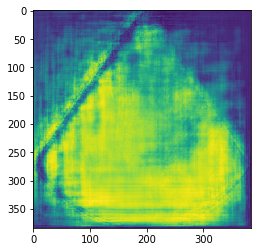

In [20]:
plt.imshow(unet_out[0,:,:,0])
plt.show()

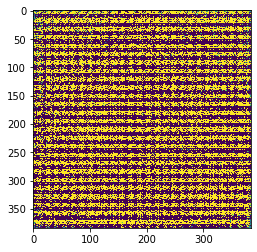

In [21]:
plt.imshow(ladder_out[0,:,:,0])
plt.show()

#### Both architectures are well defined and are ready to be used!